In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

#from simpleplot import *
#from radmc3dPy import image
#from gizmopy.load_from_snapshot import load_from_snapshot
#from gizmopy.load_fire_snap import load_fire_snap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'


params = {"text.color" : 'w',
          "ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
'''
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

'''
plt.rcParams.update(params)

'''
for generalization, see "#change" throughout code on lines where needs change depending on emission line instance (ctrl+f tofind and change quickly), most changes should be covered by changing the parent variable below.
'''
#parent = '/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum155/CII_158mu/' #change 

'\nfor generalization, see "#change" throughout code on lines where needs change depending on emission line instance (ctrl+f tofind and change quickly), most changes should be covered by changing the parent variable below.\n'

In [2]:
''' READ IN OF HDF5 FILE '''
file_151 = '151_moments_all_lines.hdf5'
file_152 = '152_moments_all_lines.hdf5'
file_155 = '155_moments_all_lines.hdf5'
file_in = h5.File(file_155, "r")
file_in.keys()

<KeysViewHDF5 ['CII_158mu', 'CO_J10', 'Halpha', 'NII_6548A', 'NeIII_15mu', 'NeIII_3869A', 'NeII_12mu', 'NeVI_7mu', 'NeV_14mu', 'NeV_3426A', 'OIII_5007A', 'OIII_88mu', 'OIV_25mu', 'OI_145mu', 'OI_6300A', 'OI_63mu', 'SIII_18mu', 'SII_6716A', 'SII_6731A']>

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


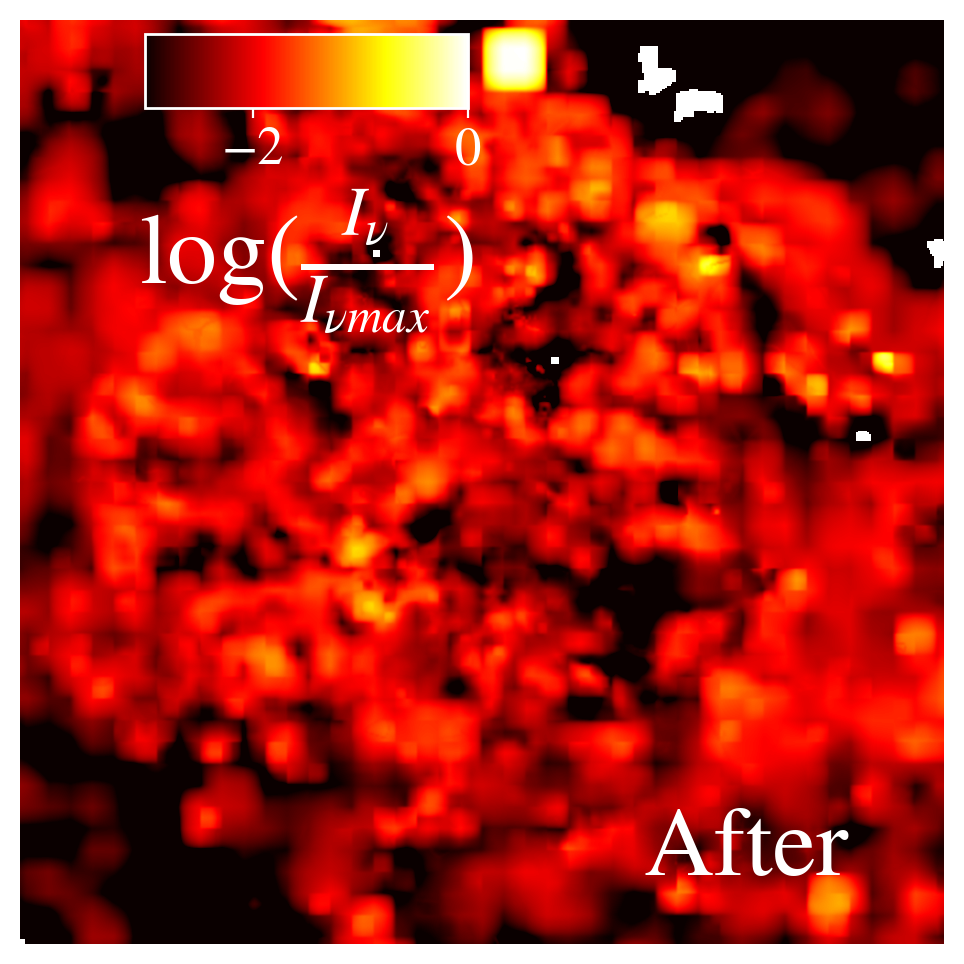

In [500]:
''' CREATING MOMENT 0 '''


for line in file_in.keys():
    if line == "SII_6731A":
        M0_arr = file_in[line]["M0"][:]

        params = {"text.color" : 'w',
                  "ytick.color" : "w",
                  "xtick.color" : "w",
                  "axes.labelcolor" : "w",
                  "axes.edgecolor" : "w"}
        plt.rcParams.update(params)

        figx, figy = 8,6

        fig, ax = plt.subplots(figsize=(figx,figy), dpi=200, facecolor='w')
        cmap = matplotlib.cm.hot.copy()
        low = cmap(0)
        cmap.set_bad(color = low)

        #plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
        plt.imshow(np.log10(M0_arr.T/np.max(M0_arr.T)), extent=(-2,2,-2,2), \
                   interpolation='bicubic', cmap='hot', vmin=-3, vmax = 0, origin='lower')
        plt.xlabel('X (kpc)', fontsize = 14)
        plt.ylabel('Y (kpc)', fontsize = 14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.axis('off')


        plt.text(0.7, -1.7, "After", fontsize = 35) #change
        cb = plt.colorbar() 
        cb.remove()
        colbar = 'w'
        cbaxes = inset_axes(ax, width="70%", height="40%", bbox_to_anchor=(0.0,0.8,0.5,0.2), bbox_transform = ax.transAxes)  #change position
        cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')
        cbar.set_label(label = r'$\log(\frac{I_{\nu}}{I_{\nu max}})$',\
                       size = 36, color = colbar)
        cbar.ax.tick_params(labelsize=19)

        cbar.outline.set_color('white')
        cbar.outline.set_linewidth(1)
        cbar.ax.xaxis.set_tick_params(color='white')
        #plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
        #          '\n [-1000,1000] '
        #         r'kms$^{-1}$', fontsize=12)
        #plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
        #          '\n [-500,500] '
        #          r'kms$^{-1}$ ', fontsize=12, usetex = True)

#         dx = 1
#         yrg = [ -dx, dx ]
#         bar_size = 1 #dx / 2.
#         xleft = -1 #-bar_size/2.
#         #xleft += 0.5*dx
#         #ybar = yrg[0] + 0.06*dx
#         ybar= -1.5
#         colbar = 'white'
        '''
        plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
        #plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
        bartxt = r'%d kpc' % np.round(bar_size).astype(int)
        plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
                horizontalalignment='center', verticalalignment='bottom' )
        plt.tight_layout()
        plt.show()
        '''

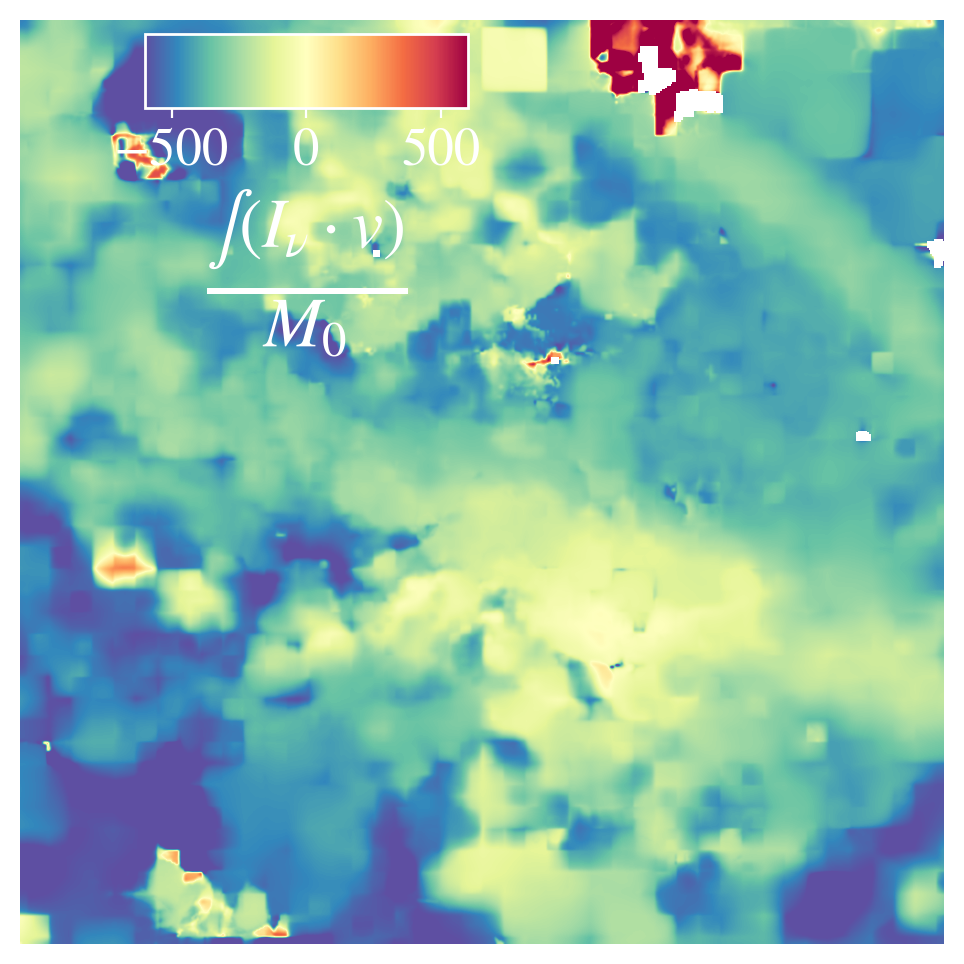

In [507]:
''' CREATING MOMENT 1 '''

for line in file_in.keys():
    if line == "SII_6731A":
        M1_arr = file_in[line]["M1"][:]

        params = {"text.color" : 'w',
                  "ytick.color" : "w",
                  "xtick.color" : "w",
                  "axes.labelcolor" : "w",
                  "axes.edgecolor" : "w"}
        plt.rcParams.update(params)

        figx, figy = 8,6

        fig, ax = plt.subplots(figsize=(figx,figy), dpi=200, facecolor='w')
        #integrated_image_array[0,0] = 0
        cmap = matplotlib.cm.hot.copy()
        low = cmap(0)
        cmap.set_bad(color = low)

        #plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
        plt.imshow(M1_arr.T, vmin = -600, vmax = 600, extent=(-2,2,-2,2), \
                   interpolation='bicubic', cmap='Spectral_r', origin='lower')
        plt.xlabel('X (kpc)', fontsize = 14)
        plt.ylabel('Y (kpc)', fontsize = 14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.axis('off')
        #plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')
        cb = plt.colorbar() 
        cb.remove()
        colbar = 'w'
        cbaxes = inset_axes(ax, width="70%", height="40%", bbox_to_anchor=(0.0,0.8,0.5,0.2), bbox_transform = ax.transAxes)  #change position
        cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')
        cbar.set_label(label = r'$\frac{\int(I_{\nu} \cdot v)}{M_0}$',\
                       size = 36, color = colbar)
        cbar.ax.tick_params(labelsize=19)

        cbar.outline.set_color('white')
        cbar.outline.set_linewidth(1)
        cbar.ax.xaxis.set_tick_params(color='white')
        #cbar.set_ticks([-4, -2, 0])
        #cbar.set_ticklabels([-4,-2,0],size = 35, color = colbar)

        #plt.text(0.1,0.9, line, fontsize = 35) #change

        #plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
        #          '\n [-1000,1000] '
        #         r'kms$^{-1}$', fontsize=12)
        #plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
        #          '\n [-500,500] '
        #          r'kms$^{-1}$ ', fontsize=12, usetex = True)
        


        '''
        dx = 1
        yrg = [ -dx, dx ]
        bar_size = 1 #dx / 2.
        xleft = -1 #-bar_size/2.
        #xleft += 0.5*dx
        #ybar = yrg[0] + 0.06*dx
        ybar= -1.5
        colbar = 'white'

        plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
        #plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
        bartxt = r'%d kpc' % np.round(bar_size).astype(int)
        plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
                horizontalalignment='center', verticalalignment='bottom' )
        plt.tight_layout()
        plt.show()
        '''

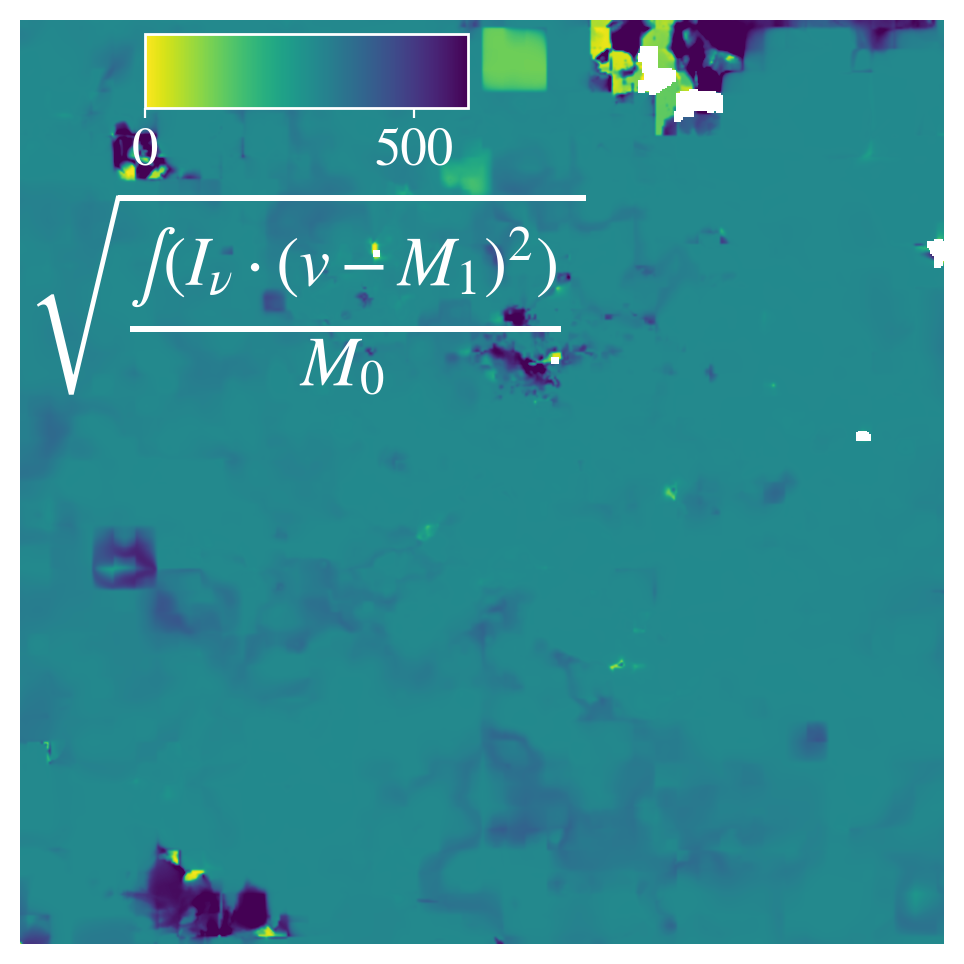

In [503]:
''' CREATING MOMENT 2 '''

for line in file_in.keys():
    if line == "SII_6731A":
        M2_arr = file_in[line]["M2"][:]

        params = {"text.color" : 'w',
                  "ytick.color" : "w",
                  "xtick.color" : "w",
                  "axes.labelcolor" : "w",
                  "axes.edgecolor" : "w"}
        plt.rcParams.update(params)

        figx, figy = 8,6

        fig, ax = plt.subplots(figsize=(figx,figy), dpi=200, facecolor='w')
        #integrated_image_array[0,0] = 0
        cmap = matplotlib.cm.hot.copy()
        low = cmap(0)
        cmap.set_bad(color = low)

        #plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
        plt.imshow(M2_arr.T, vmin = 0, vmax = 600, extent=(-2,2,-2,2), \
                   interpolation='bicubic', cmap='viridis_r', origin='lower')
        plt.xlabel('X (kpc)', fontsize = 14)
        plt.ylabel('Y (kpc)', fontsize = 14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.axis('off')
        #plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')

        #plt.text(0.1,0.9, line, fontsize = 35)
        cb = plt.colorbar() 
        cb.remove()
        colbar = 'w'
        cbaxes = inset_axes(ax, width="70%", height="40%", bbox_to_anchor=(0.0,0.8,0.5,0.2), bbox_transform = ax.transAxes)  #change position
        cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')
        cbar.set_label(label = r'$\sqrt{\frac{\int(I_{\nu} \cdot (v-M_1)^2)}{M_0}}$',\
                       size = 36, color = colbar)
        cbar.ax.tick_params(labelsize=19)

        cbar.outline.set_color('white')
        cbar.outline.set_linewidth(1)
        cbar.ax.xaxis.set_tick_params(color='white')
        #cb.remove()
        #plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
        #          '\n [-1000,1000] '
        #         r'kms$^{-1}$', fontsize=12)
        #plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
        #          '\n [-500,500] '
        #          r'kms$^{-1}$ ', fontsize=12, usetex = True)

#         plt.axis('off')
#         dx = 1
#         yrg = [ -dx, dx ]
#         bar_size = 1 #dx / 2.
#         xleft = -1 #-bar_size/2.
#         #xleft += 0.5*dx
#         #ybar = yrg[0] + 0.06*dx
#         ybar= -1.5
        #colbar = 'white'
        '''
        plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
        #plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
        bartxt = r'%d kpc' % np.round(bar_size).astype(int)
        plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
                horizontalalignment='center', verticalalignment='bottom' )
        plt.tight_layout()
        plt.show()
        '''

In [304]:
file_in.close()